=== Model Evaluation ===
Accuracy: 78.62%
Precision: 0.662605435801312
Recall: 0.3098159509202454
F1 Score: 0.42221558674231113

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      6767
           1       0.66      0.31      0.42      2282

    accuracy                           0.79      9049
   macro avg       0.73      0.63      0.65      9049
weighted avg       0.77      0.79      0.76      9049



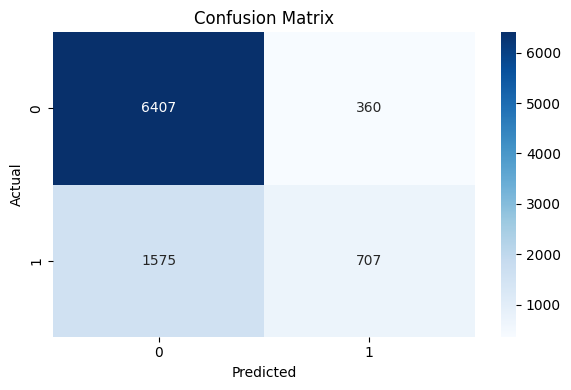


=== Sample Test Predictions ===
   Actual  Predicted
0       1          0
1       0          0
2       1          0
3       0          0
4       0          0


In [2]:
# Naive Bayes Classification Assignment
# Dataset: Adult Income (Census)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Step 1: Load dataset with correct headers
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
df = pd.read_csv("adult.csv", header=None, names=column_names, skipinitialspace=True)

# Step 2: Handle missing values represented by '?'
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Step 3: Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 4: Train-test split
X = df.drop("income", axis=1)
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Model Evaluation ===")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Step 9: Test on a few samples
print("\n=== Sample Test Predictions ===")
sample_test = X_test.iloc[:5]
true_labels = y_test.iloc[:5].values
predicted_labels = model.predict(sample_test)

sample_results = pd.DataFrame({
    "Actual": true_labels,
    "Predicted": predicted_labels
})
print(sample_results)
